In [30]:
import pandas as  pd
from scipy import stats
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
import warnings
warnings.filterwarnings('ignore')

In [2]:
lfp_data = scipy.io.loadmat('Matlab\MVGC1-master\MVGC1-master\lfp.mat')
print(list(lfp_data.keys()))
lfp_data = lfp_data['X_in_sessions']
lfp_data.shape

['__header__', '__version__', '__globals__', 'X_in_sessions']


(2, 4000, 196)

## Auto-Correlation

Text(0.5, 1.0, 'Autocorrelation during time for v4 channel data (averaged on trials)')

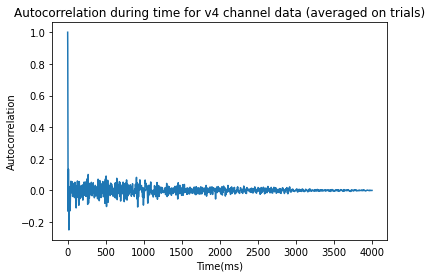

In [3]:
lfp_time = np.mean(lfp_data[0], axis =1)
# Mean
mean = np.mean(lfp_time)

# Variance
var = np.var(lfp_time)

# Normalized data
ndata = lfp_time - mean

acorr = np.correlate(ndata, ndata, 'full')[len(ndata)-1:] 
acorr = acorr / var / len(ndata)

plt.plot(acorr)
plt.xlabel("Time(ms)")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation during time for v4 channel data (averaged on trials)")

Text(0.5, 1.0, 'Autocorrelation during time for EFE channel data (averaged on trials)')

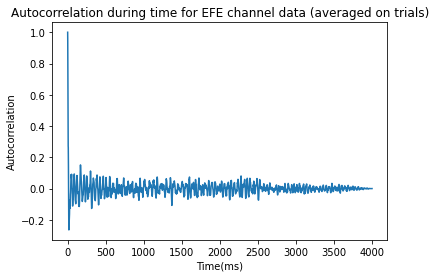

In [4]:
lfp_time = np.mean(lfp_data[1], axis =1)
# Mean
mean = np.mean(lfp_time)

# Variance
var = np.var(lfp_time)

# Normalized data
ndata = lfp_time - mean

acorr = np.correlate(ndata, ndata, 'full')[len(ndata)-1:] 
acorr = acorr / var / len(ndata)

plt.plot(acorr)
plt.xlabel("Time(ms)")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation during time for EFE channel data (averaged on trials)")

## ADF

In [8]:
lfp_data[0].shape

(4000, 196)

In [6]:

def adf_test(timeseries):
    dftest = adfuller(timeseries, autolag="AIC")
    return dftest


In [16]:
counter = 0
counter_all = 0
for i in range(lfp_data[0].shape[1]):
    for index in range(0, lfp_data[0].shape[0], 150):
        counter_all +=1
        if index < 3850:
            lfp_time0 = lfp_data[0,index:index+150,i]
            results = adf_test(lfp_time0)
            if results[1] > 0.05:
                counter +=1
            
counter/counter_all

0.22108843537414966

In [21]:
counter = 0
counter_all = 0
for i in range(lfp_data[1].shape[1]):
    for index in range(0, lfp_data[1].shape[0],150 ):
        counter_all +=1
        if index < 3850:
            lfp_time0 = lfp_data[1,index:index+150,i]
            results = adf_test(lfp_time0)
            if results[1] > 0.05:
                counter +=1
            
counter/counter_all

0.23015873015873015

## KPSS

In [31]:

def kpss_test(timeseries):
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    return kpsstest

In [32]:
counter = 0
counter_all = 0
for i in range(lfp_data[0].shape[1]):
    for index in range(0, lfp_data[0].shape[0], 150):
        counter_all +=1
        if index < 3850:
            lfp_time0 = lfp_data[0,index:index+150,i]
            results = kpss_test(lfp_time0)
            if results[1] < 0.05:
                counter +=1
            
counter/counter_all

0.003212396069538927

In [33]:
counter = 0
counter_all = 0
for i in range(lfp_data[1].shape[1]):
    for index in range(0, lfp_data[1].shape[0],150 ):
        counter_all +=1
        if index < 3850:
            lfp_time0 = lfp_data[1,index:index+150,i]
            results = kpss_test(lfp_time0)
            if results[1] < 0.05:
                counter +=1
            
counter/counter_all

0.0007558578987150416